<a href="https://colab.research.google.com/github/dina-masry/Adult-Income-Prediction/blob/main/Adult_Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adult Income Prediction Project
 - Author : Dina Almasri

##Import packages

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OrdinalEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

##Load the data

In [27]:
path ='/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week18/Data/adult.csv'
df = pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


##Inspect the data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- Data contains of 15 features and 48842 rows where each row represents an adult person.
- There are varity of data types (9 numeric features and 9 categorical features).

In [29]:
# check duplicated rows
df.duplicated().sum()

np.int64(52)

In [30]:
#drop duplicates
df= df.drop_duplicates()

In [31]:
#check null values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


- it seems that there is no null values! but I will check consistency.

In [32]:
# check consistencies for categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  print(f'{df[col].value_counts()}')

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      

- I noticed ? in the catgories which means null . I will replace them witl null values.

In [33]:
df[cat_cols] = df[cat_cols].replace('?',np.nan)

In [34]:
df.isnull().sum().sum()

np.int64(6456)

- We got 6456 null values. Let`s check numeric features.

In [35]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
  print(f'{df[col].describe().round(2)}')
  print('-------------------------------------')

count    48790.00
mean        38.65
std         13.71
min         17.00
25%         28.00
50%         37.00
75%         48.00
max         90.00
Name: age, dtype: float64
-------------------------------------
count      48790.00
mean      189669.00
std       105617.23
min        12285.00
25%       117555.00
50%       178138.50
75%       237606.25
max      1490400.00
Name: fnlwgt, dtype: float64
-------------------------------------
count    48790.00
mean        10.08
std          2.57
min          1.00
25%          9.00
50%         10.00
75%         12.00
max         16.00
Name: educational-num, dtype: float64
-------------------------------------
count    48790.00
mean      1080.22
std       7455.91
min          0.00
25%          0.00
50%          0.00
75%          0.00
max      99999.00
Name: capital-gain, dtype: float64
-------------------------------------
count    48790.00
mean        87.60
std        403.21
min          0.00
25%          0.00
50%          0.00
75%          0.00
ma

- Everything is good.
- Delete education as it indicates to the same thing of what educational-num feature indictes.

In [36]:
df= df.drop('education', axis=1)

##Exploratory Visualizations


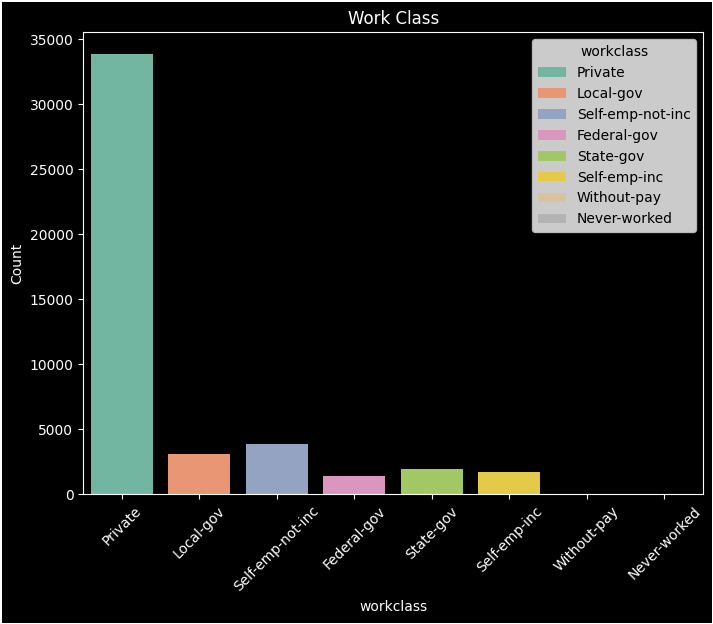

In [65]:
plot_cat(df,'workclass','Work Class')

- This countplot shows that most of people in this dataset have private work (about 34000 person).
- A little people (about 4000) don`t have self employment.
-About 3000 person have local goverment work.

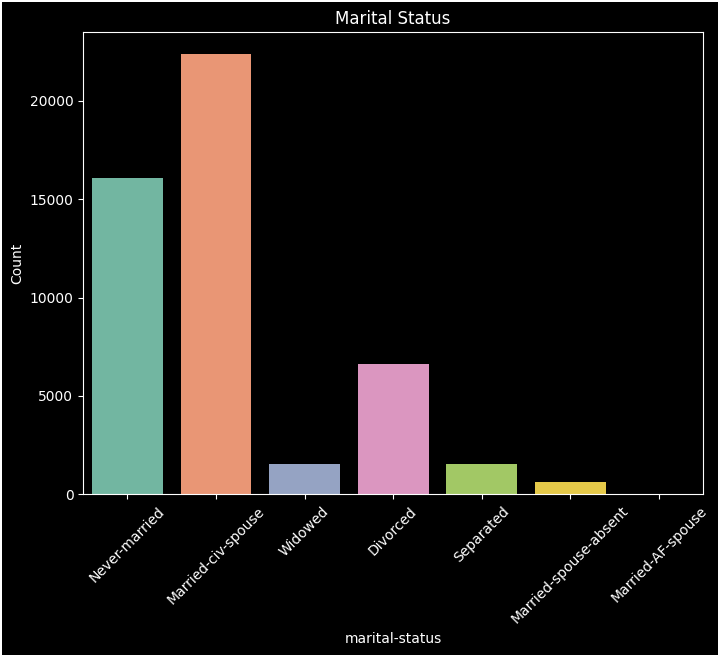

In [66]:
plot_cat(df,'marital-status','Marital Status')

- This countplot shows that:
  - Most of people here are married to someone who is not in  the military (about 25000).
  - About 16000 person are never married.
  - About 1000 person are widowed.
  - About 7000 persons are divorced.

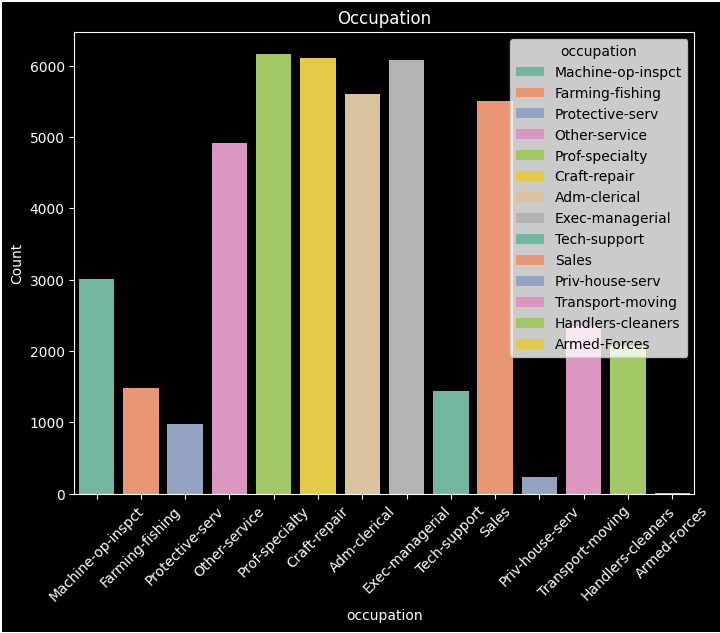

In [67]:
plot_cat(df,'occupation','Occupation')

- A very little people works at armed forces.

##Preprocessing data for modeling

In [37]:
# split data into training and testing sets
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
# preprocess numeric features
numeric_features = X_train.select_dtypes(include='number').columns
# there is no null values here
#scale the data
scaler= StandardScaler()
num_pipeline = make_pipeline(scaler)
num_tuple = ('numeric',num_pipeline, numeric_features)

In [40]:
# preprocess categorical features
categorical_features = X_train.select_dtypes(include='object').columns
imputer = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(sparse_output=False,drop='first')
cat_pipeline = make_pipeline(imputer, encoder)
cat_tuple = ('categorical', cat_pipeline, categorical_features)

In [41]:
# fit the data
preprocessor = ColumnTransformer(transformers=[num_tuple, cat_tuple],verbose_feature_names_out=False)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [42]:
# transform the data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

##Create Logistic regression

In [47]:
# create a baseline model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_processed, y_train)

LogisticRegression(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91     27841
        >50K       0.73      0.60      0.66      8751

    accuracy                           0.85     36592
   macro avg       0.81      0.77      0.78     36592
weighted avg       0.85      0.85      0.85     36592



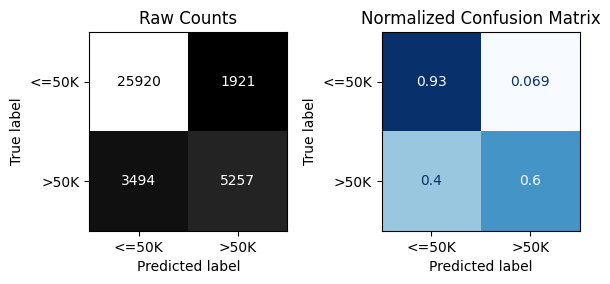


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      9268
        >50K       0.75      0.58      0.65      2930

    accuracy                           0.85     12198
   macro avg       0.81      0.76      0.78     12198
weighted avg       0.85      0.85      0.85     12198



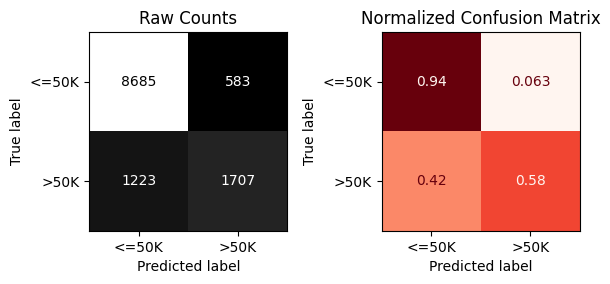

In [48]:
# evaluate baseline model
evaluate_classification(lr, X_train_processed, y_train, X_test_processed, y_test)

- Notice that the data is imbalanced. I will fix this to get better results.

In [50]:
# oversampling using smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.85      0.80      0.82     27841
        >50K       0.81      0.86      0.83     27841

    accuracy                           0.83     55682
   macro avg       0.83      0.83      0.83     55682
weighted avg       0.83      0.83      0.83     55682



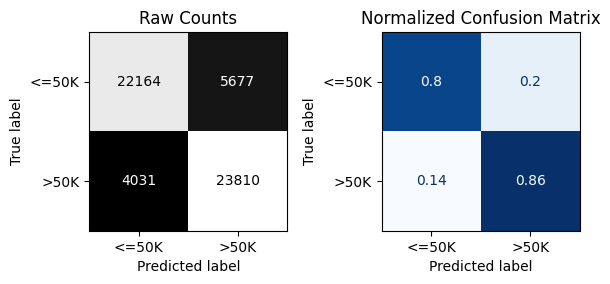


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.87      9268
        >50K       0.57      0.84      0.68      2930

    accuracy                           0.81     12198
   macro avg       0.76      0.82      0.77     12198
weighted avg       0.85      0.81      0.82     12198



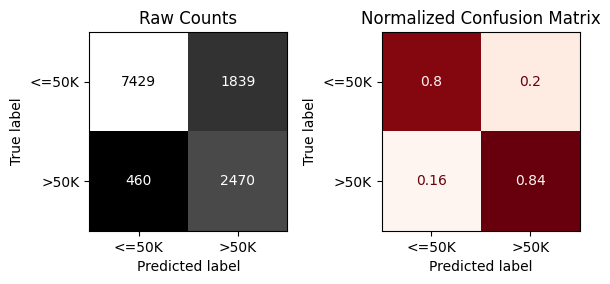

In [51]:
# create another model using resampled data
lr_resampled = LogisticRegression(random_state=42)
lr_resampled.fit(X_train_resampled, y_train_resampled)
#evaluate
evaluate_classification(lr_resampled, X_train_resampled, y_train_resampled, X_test_processed, y_test)

- I will try to tune L1/l2 regularization to get better results.

In [55]:
# Params compatible with penality='elasticnet'
elasticnet_params = {'solver' : ['saga'],
               'penalty' : ['elasticnet'],
                'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4,
                                                 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
# Params compatible with penality='l2'
l2_params = {'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga'],
                  'penalty' : ['l2'],
                  'C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000] }
# Params compatible with penality='l1'
l1_params = {'solver' : ['liblinear', 'saga'],
               'penalty' : ['l1'],
                'C': [0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100, 1000]}
# Params with no penality
none_params = {'solver' : ['lbfgs', 'newton-cg',
                                               'newton-cholesky', 'sag', 'saga'],
               'penalty' : [None]}
# Now make a list of the param dictionaries
param_grid = [l2_params, l1_params, elasticnet_params, none_params]

In [68]:
# Instantiate gridsearch
gs = GridSearchCV(lr_resampled, param_grid, verbose = 5, n_jobs = -1,
                  scoring='recall_macro')
# Fit the gs on the training data only
gs.fit(X_train_resampled, y_train_resampled)
gs.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'C': 1, 'penalty': 'l2', 'solver': 'saga'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.85      0.80      0.82     27841
        >50K       0.81      0.86      0.83     27841

    accuracy                           0.83     55682
   macro avg       0.83      0.83      0.83     55682
weighted avg       0.83      0.83      0.83     55682



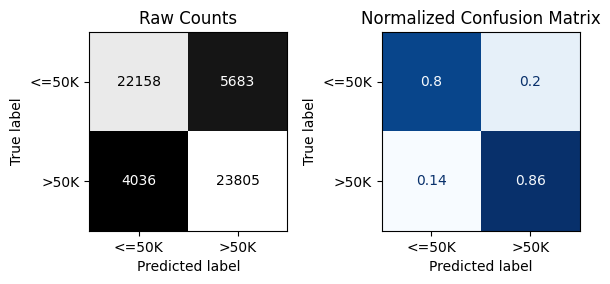


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.87      9268
        >50K       0.57      0.84      0.68      2930

    accuracy                           0.81     12198
   macro avg       0.76      0.82      0.77     12198
weighted avg       0.85      0.81      0.82     12198



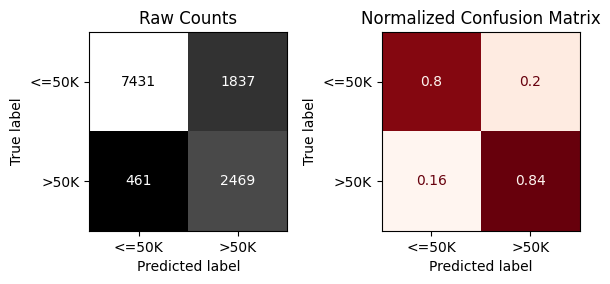

In [69]:
best_lr= gs.best_estimator_
#evaluate
evaluate_classification(best_lr, X_train_resampled, y_train_resampled, X_test_processed, y_test)

In [73]:
r = permutation_importance(best_lr, X_test_processed, y_test, n_repeats=5, random_state=42)
permutation_importance = pd.Series(r.importances_mean, index=preprocessor.get_feature_names_out(),name='permutation importance')
permutation_importance = permutation_importance.sort_values(ascending= False)
permutation_importance

,permutation importance
marital-status_Married-civ-spouse,0.060584
educational-num,0.029283
capital-gain,0.022791
workclass_Self-emp-not-inc,0.005673
relationship_Not-in-family,0.004443
...,...
relationship_Other-relative,-0.000475
marital-status_Separated,-0.000689
gender_Male,-0.003378
marital-status_Never-married,-0.003443


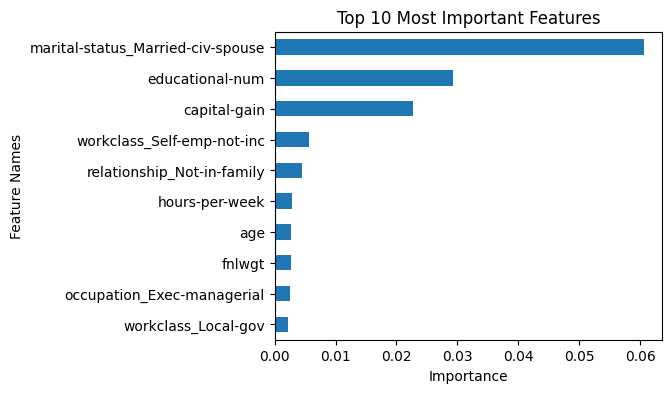

In [75]:
plot_importance_color(permutation_importance, top_n=10);

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'marital-status vs. income'}, xlabel='marital-status', ylabel='Percent'>)

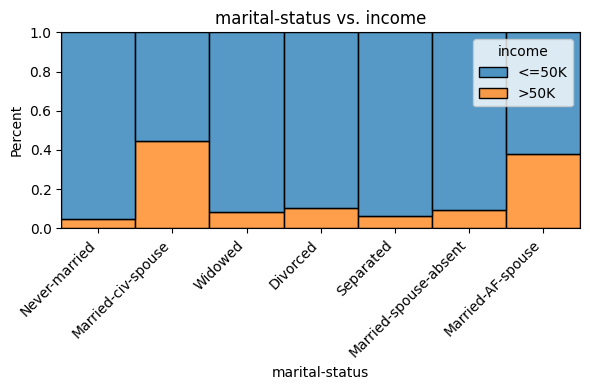

In [81]:
plot_categorical_vs_target(df,x='marital-status',y='income',figsize=(6,4),
                            fillna = False,order = None, target_type='class')

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'educational-num vs. income'}, xlabel='income', ylabel='educational-num'>)

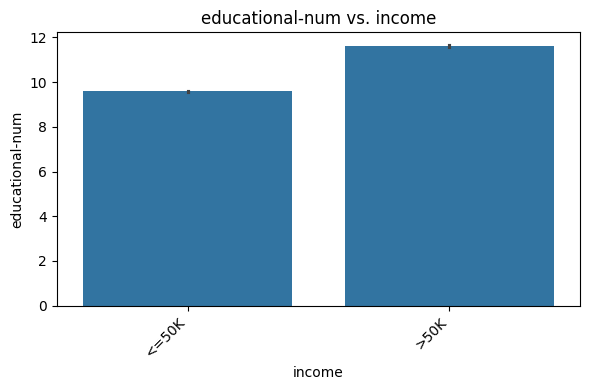

In [82]:
plot_numeric_vs_target(df,x='educational-num',y='income',figsize=(6,4),
                           target_type='class', estimator='mean',
                           errorbar='ci',sorted=False,ascending=False)

### Custom functions

In [79]:
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [58]:
def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci',sorted=False,ascending=False,
                           **kwargs): # kwargs for sns.regplot

  nulls = df[[x,y]].isna().sum()
  if nulls.sum()>0:
    print(f"- Excluding {nulls.sum()} NaN's")
    # print(nulls)
    temp_df = df.dropna(subset=[x,y,])
  else:
    temp_df = df
  # Create the figure
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if 'reg' in target_type:
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    scatter_kws={'ec':'white','lw':1,'alpha':0.8}
    sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})")

  # CLASSIFICATION-TARGET PLOT
  elif 'class' in target_type:

    # Sort the groups by median/mean
    if sorted == True:

      if estimator == 'median':
        group_vals = temp_df.groupby(y)[x].median()
      elif estimator =='mean':
        group_vals = temp_df.groupby(y)[x].mean()

      ## Sort values
      group_vals = group_vals.sort_values(ascending=ascending)
      order = group_vals.index

    else:
      # Set order to None if not calcualted
      order = None


    # Left Subplot (barplot)
    sns.barplot(data=temp_df, x=y, y=x, order=order,  estimator=estimator,
                errorbar=errorbar, ax=ax, **kwargs)

    # Add title
    ax.set_title(f"{x} vs. {y}")

    # rotate xaxis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


  # Final Adjustments & return
  fig.tight_layout()
  fig.show()
  return fig, ax

In [64]:
def plot_cat(df,col,title):
  fig, ax = plt.subplots(figsize=(8, 6))
  fig.patch.set_facecolor('black')
  fig.patch.set_edgecolor('white')
  fig.patch.set_linewidth(2)
  ax.set_facecolor('black')
  ax.tick_params(colors='white')
  ax.set_xlabel(col ,color='white')
  ax.set_ylabel('Count',color='white')
  for spine in ax.spines.values():
    spine.set_color('white')
  sns.countplot(data=df, x=col, ax=ax, hue= col , palette='Set2')
  ax.set_title(title,color= 'white')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [45]:
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [74]:
def plot_importance_color(importances, top_n=None,  figsize=(5,4),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax